In [44]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
infile1 = open('../data/processed/batters/2019_batters_date_shifted.pickle','rb')
batters = pickle.load(infile1)
infile1.close()

In [4]:
batters

,player_id,game_date,shift_date,player_name,total_pitches,hits,abs,whiffs,swings,takes,...,line_drive,ground_ball,fly_ball,popup,rbi,sac,ba,slg,iso,babip
0,282332,2019-01-01,2019-04-30,CC Sabathia,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000
1,282332,2019-04-30,2019-08-24,CC Sabathia,10,0,2,3,5,5,...,0,0,0,0,0,0,0.000000,0.000000,0.0,NaN
3,400085,2019-01-01,2019-03-20,Ichiro Suzuki,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000
4,400085,2019-03-20,2019-03-21,Ichiro Suzuki,11,0,1,0,5,6,...,0,0,0,1,0,0,0.000000,0.000000,0.0,0.000000
6,405395,2019-01-01,2019-03-28,Albert Pujols,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52123,676606,2019-05-05,2019-05-12,Nick Margevicius,46,2,9,5,17,28,...,1,4,0,2,0,2,0.222222,0.222222,0.0,0.285714
52124,676606,2019-05-12,2019-05-18,Nick Margevicius,54,3,11,6,20,33,...,2,4,0,2,0,2,0.272727,0.272727,0.0,0.375000
52125,676606,2019-05-18,2019-06-01,Nick Margevicius,59,3,12,7,22,36,...,2,4,0,2,0,2,0.250000,0.250000,0.0,0.375000
52126,676606,2019-06-01,2019-06-07,Nick Margevicius,65,3,13,7,25,39,...,2,5,0,2,0,2,0.230769,0.230769,0.0,0.333333


In [8]:
batters.groupby(by=['player_id', 'game_date']).max()

shift_date       player_name  total_pitches  hits  abs  \
player_id game_date                                                           
282332    2019-01-01 2019-04-30       CC Sabathia              0     0    0   
          2019-04-30 2019-08-24       CC Sabathia             10     0    2   
400085    2019-01-01 2019-03-20     Ichiro Suzuki              0     0    0   
          2019-03-20 2019-03-21     Ichiro Suzuki             11     0    1   
405395    2019-01-01 2019-03-28     Albert Pujols              0     0    0   
...                         ...               ...            ...   ...  ...   
676606    2019-05-05 2019-05-12  Nick Margevicius             46     2    9   
          2019-05-12 2019-05-18  Nick Margevicius             54     3   11   
          2019-05-18 2019-06-01  Nick Margevicius             59     3   12   
          2019-06-01 2019-06-07  Nick Margevicius             65     3   13   
          2019-06-07 2019-06-16  Nick Margevicius             69     3   14   

                      whiffs  swings  takes  k  walk  ...  line_drive  \
player_id game_date                                   ...               
282332    2019-01-01       0       0      0  0     0  ...           0   
          2019-04-30       3       5      5  2     0  ...           0   
400085    2019-01-01       0       0      0  0     0  ...           0   
          2019-03-20       0       5      6  0     1  ...           0   
405395    2019-01-01       0       0      0  0     0  ...           0   
...                      ...     ...    ... ..   ...  ...         ...   
676606    2019-05-05       5      17     28  4     0  ...           1   
          2019-05-12       6      20     33  5     0  ...           2   
          2019-05-18       7      22     36  6     0  ...           2   
          2019-06-01       7      25     39  6     0  ...           2   
          2019-06-07       7      26     42  6     0  ...           2   

                      ground_ball  fly_ball  popup  rbi  sac        ba  \
player_id game_date                                                      
282332    2019-01-01            0         0      0    0    0  0.000000   
          2019-04-30            0         0      0    0    0  0.000000   
400085    2019-01-01            0         0      0    0    0  0.000000   
          2019-03-20            0         0      1    0    0  0.000000   
405395    2019-01-01            0         0      0    0    0  0.000000   
...                           ...       ...    ...  ...  ...       ...   
676606    2019-05-05            4         0      2    0    2  0.222222   
          2019-05-12            4         0      2    0    2  0.272727   
          2019-05-18            4         0      2    0    2  0.250000   
          2019-06-01            5         0      2    0    2  0.230769   
          2019-06-07            6         0      2    0    2  0.214286   

                           slg  iso     babip  
player_id game_date                            
282332    2019-01-01  0.000000  0.0  0.000000  
          2019-04-30  0.000000  0.0       NaN  
400085    2019-01-01  0.000000  0.0  0.000000  
          2019-03-20  0.000000  0.0  0.000000  
405395    2019-01-01  0.000000  0.0  0.000000  
...                        ...  ...       ...  
676606    2019-05-05  0.222222  0.0  0.285714  
          2019-05-12  0.272727  0.0  0.375000  
          2019-05-18  0.250000  0.0  0.375000  
          2019-06-01  0.230769  0.0  0.333333  
          2019-06-07  0.214286  0.0  0.300000  

[51139 rows x 24 columns]

In [25]:
pg = pd.read_csv('../data/processed/batters/2019_batter_data_by_game.csv', index_col=0)

In [27]:
pg.player_id = pg.player_id.apply(lambda p: str(p))

In [28]:
pg.sort_values(by='game_date', ascending = False)

,pitches,player_id,player_name,game_date,total_pitches,pitch_percent,ba,iso,babip,slg,...,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance,team
994,19,624413,Pete Alonso,2019-09-29,19,100.0,0.20,0.00,0.333,0.20,...,-1.9,5.27,114.0,156.0,118.0,152.0,299.0,327.0,314.0,nym
1585,17,663757,Trent Grisham,2019-09-29,17,100.0,0.00,0.00,0.000,0.00,...,0.0,5.88,123.0,148.0,107.0,155.0,304.0,345.0,312.0,mil
1168,11,668942,Josh Rojas,2019-09-29,11,100.0,0.00,0.00,0.000,0.00,...,-0.9,5.75,128.0,146.0,144.0,155.0,298.0,328.0,303.0,ari
749,9,656371,Isan Diaz,2019-09-29,9,100.0,0.25,0.75,0.000,1.00,...,0.0,6.28,104.0,148.0,109.0,154.0,299.0,320.0,299.0,mia
892,19,664702,Myles Straw,2019-09-29,19,100.0,0.25,0.25,0.333,0.50,...,-0.5,5.98,105.0,151.0,112.0,142.0,299.0,314.0,286.0,hou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,28,429665,Edwin Encarnacion,2019-03-20,28,100.0,0.00,0.00,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sea
677,13,543829,Dee Gordon,2019-03-20,13,100.0,0.25,0.00,0.250,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sea
697,17,457803,Jay Bruce,2019-03-20,17,100.0,0.25,0.00,0.500,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sea
39,13,542921,Tim Beckham,2019-03-20,13,100.0,1.00,1.00,1.000,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sea


In [31]:
pg = pg.groupby(by='player_id').sum()
pg.columns

Index(['pitches', 'total_pitches', 'pitch_percent', 'ba', 'iso', 'babip',
       'slg', 'woba', 'xwoba', 'xba', 'hits', 'abs', 'launch_speed',
       'launch_angle', 'spin_rate', 'velocity', 'effective_speed', 'whiffs',
       'swings', 'takes', 'eff_min_vel', 'release_extension',
       'pos3_int_start_distance', 'pos4_int_start_distance',
       'pos5_int_start_distance', 'pos6_int_start_distance',
       'pos7_int_start_distance', 'pos8_int_start_distance',
       'pos9_int_start_distance'],
      dtype='object')

In [32]:
pg.drop(columns = ['total_pitches', 'pitch_percent', 'ba', 'iso', 'babip',
       'slg', 'woba', 'xwoba', 'xba', 'launch_speed',
       'launch_angle', 'spin_rate', 'velocity', 'effective_speed', 'eff_min_vel', 'release_extension',
       'pos3_int_start_distance', 'pos4_int_start_distance',
       'pos5_int_start_distance', 'pos6_int_start_distance',
       'pos7_int_start_distance', 'pos8_int_start_distance',
       'pos9_int_start_distance'])

,pitches,hits,abs,whiffs,swings,takes
player_id,,,,,,
282332,13,0,3,3,7,6
400085,30,0,5,2,14,16
405395,2085,120,491,169,928,1154
408234,2033,139,493,246,1008,1022
425772,937,36,228,179,485,449
...,...,...,...,...,...,...
670950,133,3,30,23,53,77
670970,4,0,1,1,2,2
671790,16,0,5,7,9,7


In [42]:
ss = StandardScaler()
X_ss = mm.fit_transform(pg[['pitches', 'hits', 'abs', 'whiffs', 'swings', 'takes']])

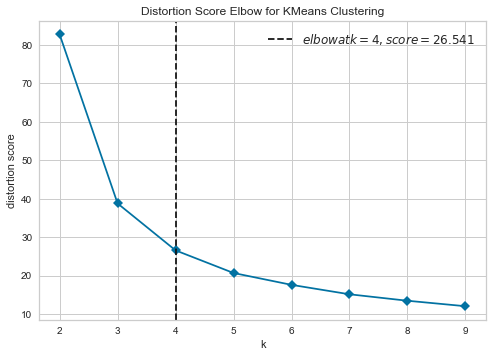

In [45]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10), 
                              metric = 'distortion', 
                              timings=False)

visualizer.fit(X_ss)
visualizer.show();

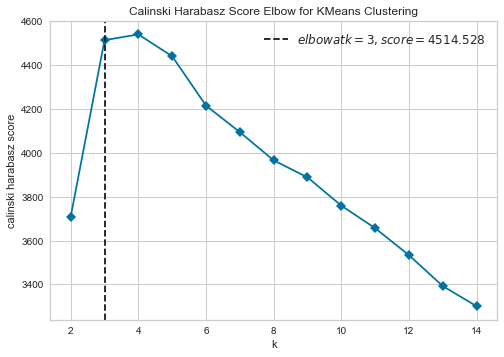

In [47]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,15), metric='calinski_harabasz', 
    timings=False, locate_elbow=True)

visualizer.fit(X_ss)
visualizer.show();

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


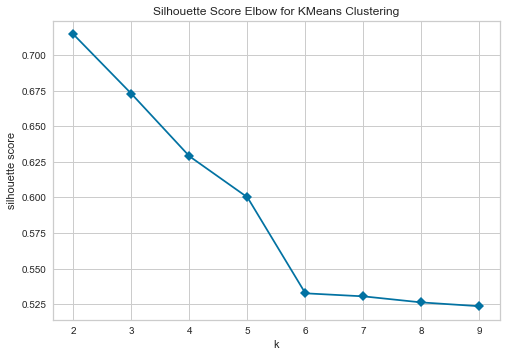

In [49]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette',  timings=False, locate_elbow=True)

visualizer.fit(X_ss)
visualizer.show();

## Lets go with four hitter types

In [50]:
pca = PCA(n_components=2, random_state=31)
X_redux = pca.fit_transform(X_ss)

In [51]:
km = KMeans(n_clusters=4, random_state=31)
clusters = km.fit(X_redux)
labels = km.labels_

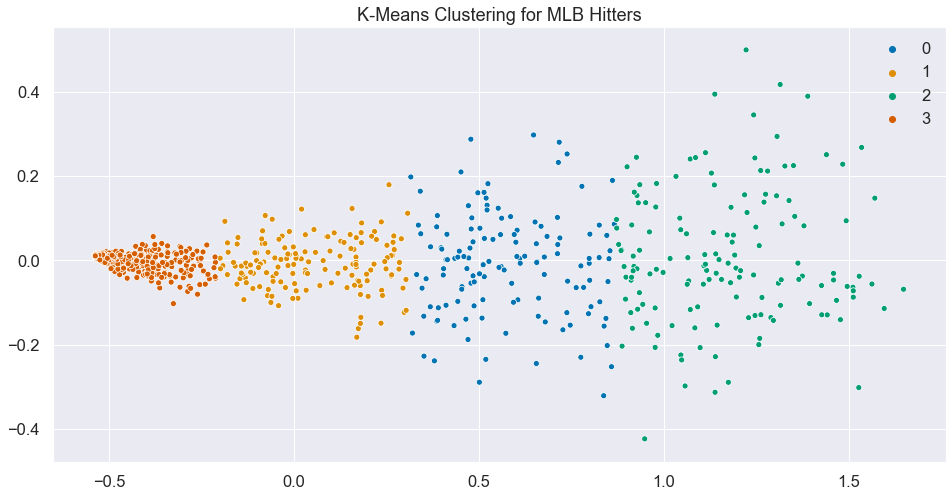

In [53]:
sns.set(font_scale=1.5)
plt.figure(figsize=(16, 8))
fig = sns.scatterplot(x = X_redux[:,0], 
                y = X_redux[:,1], 
                hue = labels, 
                palette = 'colorblind').set_title('K-Means Clustering for MLB Hitters');

In [54]:
pg['cluster'] = labels

In [55]:
pg

,pitches,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,...,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance,cluster
player_id,,,,,,,,,,,,,,,,,,,,,
282332,13,13,200.0,0.000,0.000,0.000,0.000,0.000,0.493,0.475,...,-0.6,11.77,247.0,322.0,240.0,309.0,575.0,611.0,602.0,3
400085,30,30,200.0,0.000,0.000,0.000,0.000,0.345,0.364,0.043,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
405395,2085,2085,13100.0,30.231,22.982,27.631,53.215,40.241,41.344,31.600,...,-69.1,763.44,13764.0,19645.0,15762.0,18873.0,39028.0,41629.0,38197.0,2
408234,2033,2033,13400.0,37.245,15.010,43.130,52.253,41.638,42.838,35.722,...,-62.7,795.42,14382.0,20107.0,16199.0,19559.0,40484.0,43673.0,38799.0,2
425772,937,937,7500.0,10.479,4.249,15.731,14.731,12.686,13.609,11.679,...,-33.5,441.87,8068.0,11303.0,8532.0,10999.0,22403.0,23824.0,21464.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670950,133,133,1900.0,2.500,0.000,3.000,2.500,2.763,2.117,1.670,...,-6.7,115.70,2133.0,2790.0,2034.0,2789.0,5515.0,5664.0,5086.0,3
670970,4,4,100.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.1,6.01,126.0,153.0,107.0,156.0,261.0,293.0,290.0,3
671790,16,16,300.0,0.000,0.000,0.000,0.000,0.000,0.190,0.224,...,-1.6,18.07,353.0,453.0,331.0,451.0,875.0,911.0,793.0,3


In [60]:
hitter_clusters = pd.DataFrame(pg.cluster)

In [61]:
filepath = '../data/processed/batters/'

outfile = open(filepath + 'hitter_clusters.pickle','wb')
pitchers = pickle.dump(hitter_clusters, outfile)
outfile.close()